In [2]:
import torch
from subprocess import run
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


def load_audio(file, sr=3000):
    cmd = [
        "ffmpeg",
        "-nostdin",
        "-threads", "0",
        "-i", file,
        "-f", "s16le",
        "-ac", "1",
        "-acodec", "pcm_s16le",
        "-ar", str(sr),
        "-"
    ]
    try:
        out = run(cmd, capture_output=True, check=True).stdout
    except:
        raise RuntimeError("Failed to run ffmpeg to load audio file")
    raw = np.frombuffer(out, dtype=np.int16)
    print(raw)

    return raw.flatten().astype(np.float32) / 32768.0


def plot_audio(audio):
    y, sr = librosa.load(audio)
    plt.plot(y)
    plt.title('Signal')
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')


def plot_spectrogram(audio):
    y, sr = librosa.load(audio)
    n_fft = 2048
    ft = np.abs(librosa.stft(y[:n_fft], hop_length=n_fft+1))
    plt.plot(ft)
    plt.title('Spectrogram')
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')



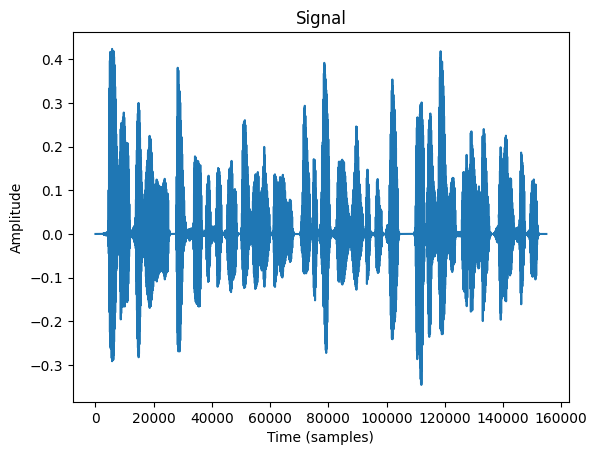

In [3]:
plot_audio('test.wav')

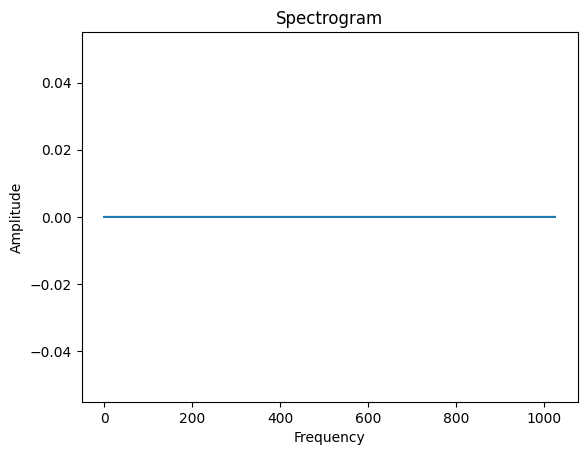

In [4]:
plot_spectrogram('test.wav')

[ 0.          0.1719291   0.33873792 ... -0.49545867 -0.33873792
 -0.1719291 ]


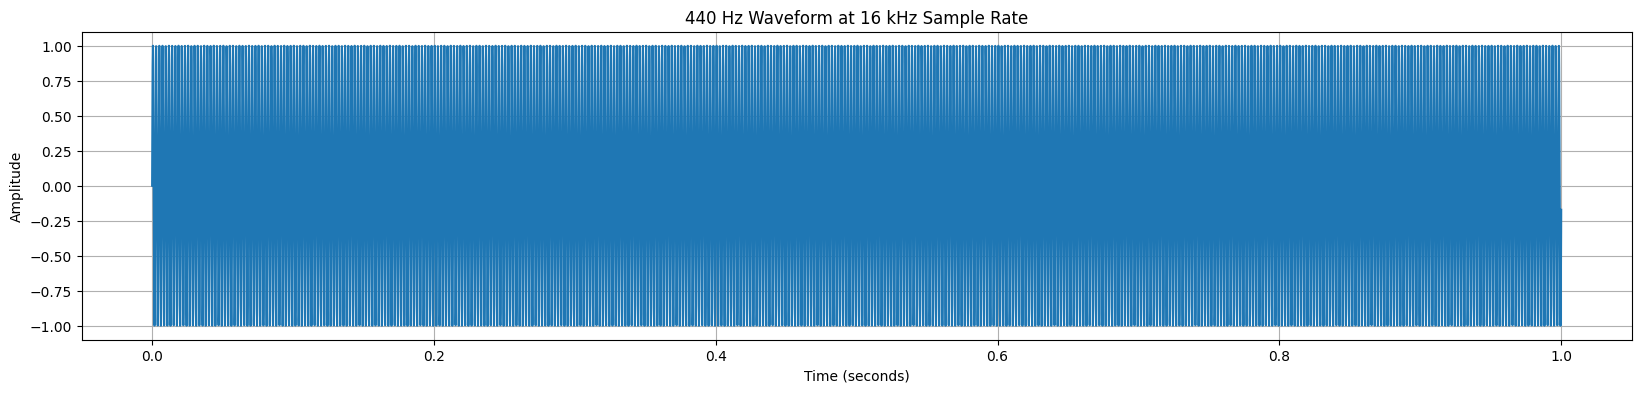

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sample rate and frequency
sample_rate = 16000  # 16 kHz
frequency = 440  # 440 Hz

# Generate a time array
t = np.linspace(0, 1, sample_rate, endpoint=False)  # One second of time

# Generate the waveform (sine wave)
waveform = np.sin(2 * np.pi * frequency * t)
print(waveform)

# Plot the waveform
plt.figure(figsize=(20, 4))
plt.plot(t, waveform)
plt.title("440 Hz Waveform at 16 kHz Sample Rate")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


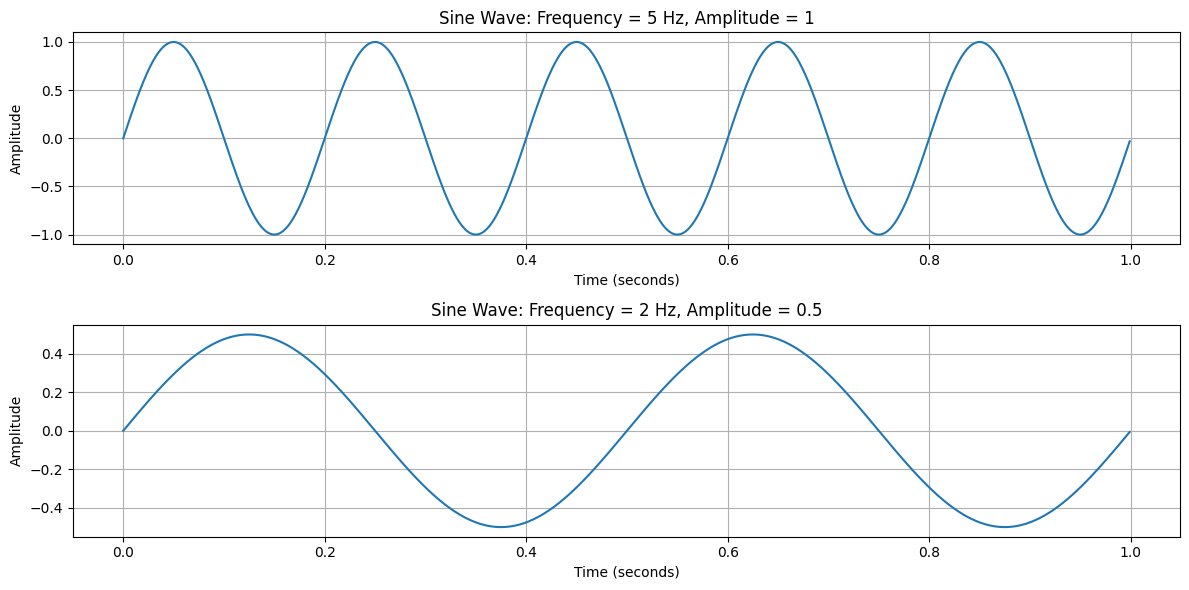

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Define sample rate and time array
sample_rate = 1000  # 1000 samples per second
t = np.linspace(0, 1, sample_rate, endpoint=False)  # One second of time

# Example 1: A sine wave with a frequency of 5 Hz and amplitude of 1
frequency_1 = 5  # 5 Hz
amplitude_1 = 1  # Amplitude 1
waveform_1 = amplitude_1 * np.sin(2 * np.pi * frequency_1 * t)

# Example 2: A sine wave with a frequency of 2 Hz and amplitude of 0.5
frequency_2 = 2  # 2 Hz
amplitude_2 = 0.5  # Amplitude 0.5
waveform_2 = amplitude_2 * np.sin(2 * np.pi * frequency_2 * t)

# Plotting both waveforms
plt.figure(figsize=(12, 6))

# Plot for the first sine wave
plt.subplot(2, 1, 1)
plt.plot(t, waveform_1)
plt.title(f"Sine Wave: Frequency = {frequency_1} Hz, Amplitude = {amplitude_1}")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)

# Plot for the second sine wave
plt.subplot(2, 1, 2)
plt.plot(t, waveform_2)
plt.title(f"Sine Wave: Frequency = {frequency_2} Hz, Amplitude = {amplitude_2}")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()


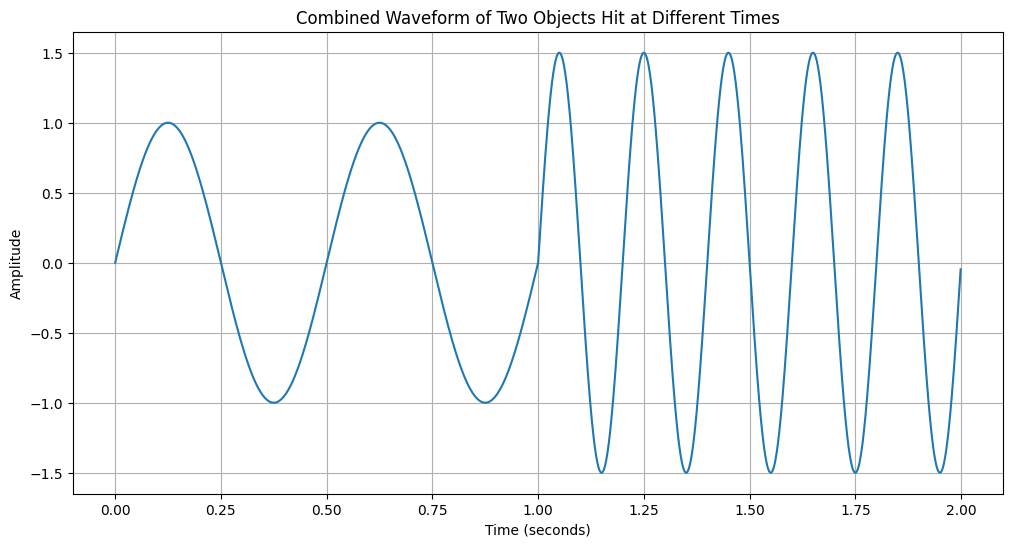

In [7]:
# Adjusting the previous code to reflect the new scenario

# Define sample rate and time array for two seconds
sample_rate = 1000  # 1000 samples per second
t = np.linspace(0, 2, 2 * sample_rate, endpoint=False)  # Two seconds of time

# Frequencies and amplitudes for two different objects
frequency_1 = 2  # Object 1 frequency in Hz (lower)
amplitude_1 = 1  # Object 1 amplitude

frequency_2 = 5  # Object 2 frequency in Hz (higher)
amplitude_2 = 1.5  # Object 2 amplitude (louder)

# Generate waveforms for two seconds
waveform_1 = np.zeros_like(t)
waveform_2 = np.zeros_like(t)

# First second: Object 1 is hit
waveform_1[t < 1] = amplitude_1 * np.sin(2 * np.pi * frequency_1 * t[t < 1])

# Second second: Object 2 is hit
waveform_2[t >= 1] = amplitude_2 * np.sin(2 * np.pi * frequency_2 * t[t >= 1])

# Combine the two waveforms
combined_waveform = waveform_1 + waveform_2

# Plotting the combined waveform
plt.figure(figsize=(12, 6))
plt.plot(t, combined_waveform)
plt.title("Combined Waveform of Two Objects Hit at Different Times")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


In [20]:
a = torch.tensor([1,2,3,4,5,6])
b = a.reshape(1,2,3)
print(b.shape)
print(b)
c = b[..., -1]**2
print(c)

torch.Size([1, 2, 3])
tensor([[[1, 2, 3],
         [4, 5, 6]]])
tensor([[ 9, 36]])


In [17]:
from subprocess import CalledProcessError, run
SAMPLE_RATE = 16000
N_FFT = 400
HOP_LENGTH = 160

def load_audio(file: str, sr: int = SAMPLE_RATE):
    """
    Open an audio file and read as mono waveform, resampling as necessary

    Parameters
    ----------
    file: str
        The audio file to open

    sr: int
        The sample rate to resample the audio if necessary

    Returns
    -------
    A NumPy array containing the audio waveform, in float32 dtype.
    """

    # This launches a subprocess to decode audio while down-mixing
    # and resampling as necessary.  Requires the ffmpeg CLI in PATH.
    # fmt: off
    cmd = [
        "ffmpeg",
        "-nostdin",
        "-threads", "0",
        "-i", file,
        "-f", "s16le",
        "-ac", "1",
        "-acodec", "pcm_s16le",
        "-ar", str(sr),
        "-"
    ]
    # fmt: on
    try:
        out = run(cmd, capture_output=True, check=True).stdout
    except CalledProcessError as e:
        raise RuntimeError(f"Failed to load audio: {e.stderr.decode()}") from e

    return np.frombuffer(out, np.int16).flatten().astype(np.float32) / 32768.0

audio = load_audio('jfk.flac')

audio = torch.from_numpy(audio)

print(audio.device)
window = torch.hann_window(N_FFT).to(audio.device)
print(window.shape)
stft = torch.stft(audio, N_FFT, HOP_LENGTH, window=window, return_complex=True)
print(stft.shape)






cpu
torch.Size([400])
torch.Size([201, 1101])


(16000,)


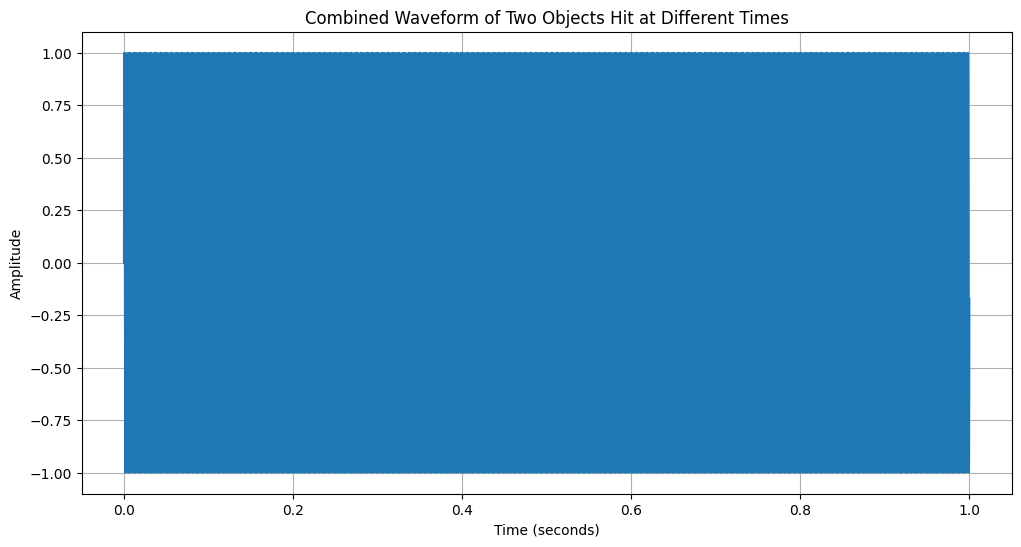

1
extended_shape: [1, 1, 16000]
input.shape torch.Size([16400])
stft.shape torch.Size([201, 101])
101.0
201
(101,)
[  0.  40.  80. 120. 160. 200. 240. 280. 320. 360.]


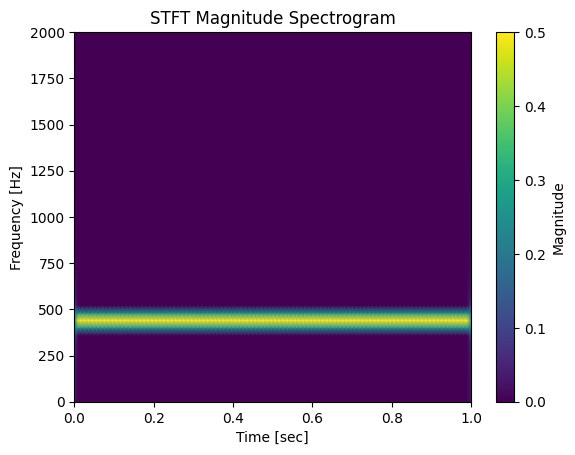

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft
from torch.functional import F


# Generate the signal
fs = 16000  # Sampling frequency (samples per second)
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector

print(t.shape)
f0 = 440  # Frequency of the sine wave
x = np.sin(2 * np.pi * f0 * t)  # Sine wave at 440 Hz

plt.figure(figsize=(12, 6))
plt.plot(t, x)
plt.title("Combined Waveform of Two Objects Hit at Different Times")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# Parameters for STFT
n_fft = 400  # Number of FFT points (window size)
hop_length = 160  # Number of samples to hop

# Compute the STFT
frequencies, times, Zxx = stft(x, fs=fs, nperseg=n_fft, noverlap=n_fft-hop_length)

window = torch.hann_window(n_fft).to(device)
torch_x = torch.from_numpy(x)
print(torch_x.dim())

signal_dim = torch_x.dim()
extended_shape = [1] * (3 - signal_dim) + list(torch_x.size())
print("extended_shape:", extended_shape)
pad = int(n_fft // 2)
input = F.pad(torch_x.view(extended_shape), [pad, pad], "reflect")
input = input.view(input.shape[-signal_dim:])

print("input.shape", input.shape)

stft = torch.stft(torch_x, n_fft, hop_length, window=window, return_complex=True)


print("stft.shape", stft.shape)

N = 1+ (16400- n_fft) / hop_length

print(frequencies.shape[0])
print(times.shape)
print(frequencies[:10])

# Plot the STFT magnitude spectrogram
plt.pcolormesh(times, frequencies, np.abs(Zxx), shading='gouraud')
plt.title('STFT Magnitude Spectrogram')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(0, 2000)  # Limit frequency axis for better visualization
plt.colorbar(label='Magnitude')
plt.show()


In [42]:
    # Examples
    # --------
    # >>> import numpy as np
    # >>> from scipy import signal
    # >>> import matplotlib.pyplot as plt
    # >>> rng = np.random.default_rng()
    # 
    # Generate a test signal, a 2 Vrms sine wave whose frequency is slowly
    # modulated around 3kHz, corrupted by white noise of exponentially
    # decreasing magnitude sampled at 10 kHz.
    # 
    # >>> fs = 10e3
    # >>> N = 1e5
    # >>> amp = 2 * np.sqrt(2)
    # >>> noise_power = 0.01 * fs / 2
    # >>> time = np.arange(N) / float(fs)
    # >>> mod = 500*np.cos(2*np.pi*0.25*time)
    # >>> carrier = amp * np.sin(2*np.pi*3e3*time + mod)
    # >>> noise = rng.normal(scale=np.sqrt(noise_power),
    # ...                    size=time.shape)
    # >>> noise *= np.exp(-time/5)
    # >>> x = carrier + noise
    # 
    # Compute and plot the STFT's magnitude.
    # 
    # >>> f, t, Zxx = signal.stft(x, fs, nperseg=1000)
    # >>> plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=amp, shading='gouraud')
    # >>> plt.title('STFT Magnitude')
    # >>> plt.ylabel('Frequency [Hz]')
    # >>> plt.xlabel('Time [sec]')
    # >>> plt.show()
    # 
    # Compare the energy of the signal `x` with the energy of its STFT:
    # 
    # >>> E_x = sum(x**2) / fs  # Energy of x
    # >>> # Calculate a two-sided STFT with PSD scaling:
    # >>> f, t, Zxx = signal.stft(x, fs, nperseg=1000, return_onesided=False,
    # ...                         scaling='psd')
    # >>> # Integrate numerically over abs(Zxx)**2:
    # >>> df, dt = f[1] - f[0], t[1] - t[0]
    # >>> E_Zxx = sum(np.sum(Zxx.real**2 + Zxx.imag**2, axis=0) * df) * dt
    # >>> # The energy is the same, but the numerical errors are quite large:
    # >>> np.isclose(E_x, E_Zxx, rtol=1e-2)
    # True
    
    
fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
time =np.arange(N) / float(fs)
print(time.shape)
    
    
    


(100000,)
